In [1]:
#!pip install citipy

# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import json
# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        #print(f'location in {city}')

# Print the city count to confirm sufficient count
len(cities)

614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# define url
url = f"http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
query_url = f'{url}&appid={api_key}&units={units}&q='
#print(query_url)

response = requests.get(query_url + city).json()
print(response)    

{'cod': '404', 'message': 'city not found'}


In [5]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        cloudinesses.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | olinda
Processing Record 2 of Set 1 | uthal
Processing Record 3 of Set 1 | saint george
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | qaanaaq
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | te anau
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | new norfolk
Processing Record 12 of Set 1 | chuy
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | pangoa
Processing Record 16 of Set 1 | kelo
Processing Record 17 of Set 1 | cabo san lucas
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | krivosheino
Processing Record 20 of Set 1 | albany
City not found. Skipping...
Processing Record 21 of Set 1 | tianpeng
Processing Record 22 of Set 1 | zhanaozen
Processing Record 23 of Set 1 | rikitea
Processing Record 24 of Set 1 | shemga

Processing Record 44 of Set 4 | nouadhibou
Processing Record 45 of Set 4 | hithadhoo
Processing Record 46 of Set 4 | grand gaube
Processing Record 47 of Set 4 | nizhnyaya salda
Processing Record 48 of Set 4 | cayenne
Processing Record 49 of Set 4 | kiama
Processing Record 1 of Set 5 | waddan
Processing Record 2 of Set 5 | labuhan
City not found. Skipping...
Processing Record 3 of Set 5 | lakhdenpokhya
Processing Record 4 of Set 5 | kununurra
Processing Record 5 of Set 5 | krynychky
Processing Record 6 of Set 5 | aykhal
Processing Record 7 of Set 5 | provideniya
Processing Record 8 of Set 5 | bereznik
Processing Record 9 of Set 5 | rovaniemi
Processing Record 10 of Set 5 | turukhansk
Processing Record 11 of Set 5 | alekseyevsk
Processing Record 12 of Set 5 | pacific grove
Processing Record 13 of Set 5 | port blair
Processing Record 14 of Set 5 | east london
Processing Record 15 of Set 5 | talnakh
Processing Record 16 of Set 5 | tiksi
Processing Record 17 of Set 5 | ust-kuyga
Processing 

Processing Record 35 of Set 8 | villa guerrero
Processing Record 36 of Set 8 | litovko
Processing Record 37 of Set 8 | dryden
Processing Record 38 of Set 8 | kinablangan
Processing Record 39 of Set 8 | ribeira grande
Processing Record 40 of Set 8 | robat karim
Processing Record 41 of Set 8 | cadereyta
Processing Record 42 of Set 8 | mamallapuram
Processing Record 43 of Set 8 | jerez
City not found. Skipping...
Processing Record 44 of Set 8 | ilhabela
Processing Record 45 of Set 8 | nioro
Processing Record 46 of Set 8 | lowestoft
Processing Record 47 of Set 8 | asau
Processing Record 48 of Set 8 | strezhevoy
Processing Record 49 of Set 8 | galesong
Processing Record 1 of Set 9 | talara
Processing Record 2 of Set 9 | malegaon
Processing Record 3 of Set 9 | dunedin
Processing Record 4 of Set 9 | weihe
Processing Record 5 of Set 9 | tczew
Processing Record 6 of Set 9 | port-cartier
Processing Record 7 of Set 9 | koutiala
Processing Record 8 of Set 9 | karoi
Processing Record 9 of Set 9 | s

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
    "City":city_two,
    "Lat":lats,
    "Lng":lngs,
    "Max Temp":max_temps,
    "Humidity":humidities,
    "Cloudiness":cloudinesses,
    "Wind Speed":wind_speeds,
    "Country":countries,
    "Date":dates})

weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olinda,-8.01,-34.86,27.00,78,40,3.10,BR,1590126646
1,uthal,25.81,66.62,38.11,21,2,2.12,PK,1590126646
2,saint george,37.10,-113.58,18.00,17,1,3.60,US,1590126646
3,busselton,-33.65,115.33,22.78,33,0,2.87,AU,1590126581
4,qaanaaq,77.48,-69.36,-2.93,86,83,2.09,GL,1590126647


In [7]:
weather_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Country       564
Date          564
dtype: int64

In [8]:
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,22.905904,18.078511,18.410195,68.242908,51.416667,3.736365,1.590127e+09
std,32.422951,89.855921,9.175536,23.572032,38.592213,2.392910,4.960941e+01
min,-54.800000,-179.170000,-8.810000,1.000000,0.000000,0.200000,1.590126e+09
25%,-3.367500,-60.172500,12.000000,55.000000,7.750000,2.100000,1.590127e+09
50%,28.730000,23.575000,19.000000,74.000000,58.500000,3.100000,1.590127e+09
75%,49.790000,100.720000,25.000000,87.000000,90.000000,5.100000,1.590127e+09
max,78.220000,179.320000,43.620000,100.000000,100.000000,13.400000,1.590127e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [12]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_df.to_csv(clean_city_data, index = False, header = False)

NameError: name 'clean_city_data' is not defined

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

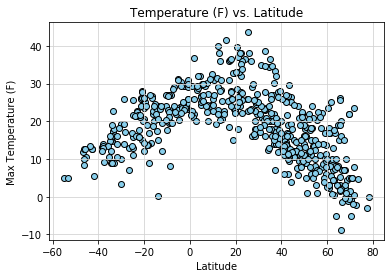

In [13]:
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

plt.scatter(weather_df['Lat'], weather_df['Max Temp'], edgecolors="black",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("Latitude_vs_Temperature.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

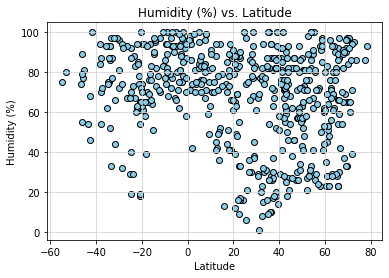

In [14]:
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors="black",facecolors="skyblue")


plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

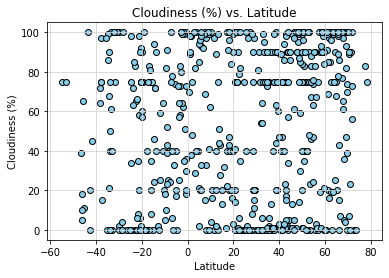

In [15]:
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors="black",facecolors="skyblue")


plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

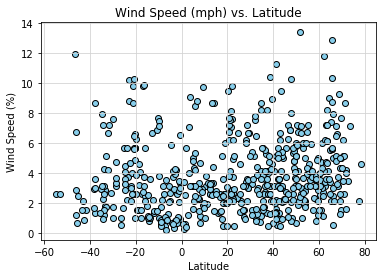

In [16]:
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")

plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolors="black",facecolors="skyblue")


plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")


# Save the figure
plt.savefig("Latitude_vs_WindSpeed.png")

# Show plot
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots

In [18]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.35598623444153055


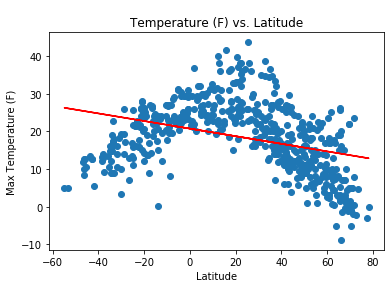

In [22]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values,regress_values,"r")

plt.annotate(line_eq,(0,50),fontsize=15,color="blue")


print(f"The r-squared is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values, y_values)
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")



(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values,regress_values,"r")

plt.annotate(line_eq,(0,50),fontsize=15,color="blue")


print(f"The r-squared is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression